In [1]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/GPproject/gplib/')
import numpy as np
% load_ext autoreload
% autoreload 2
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
from gplib.gpc import GPCLaplace, GPCSparse
from gplib.covfun import SE

In [3]:
dim = 2
num = 200
test_num= 100
x_tr = np.random.rand(num, dim)
if dim == 1:
    x_test = np.linspace(0, 1, test_num)
    x_test = x_test.reshape(test_num, 1)
else:
    x_test = np.random.rand(test_num, dim)

In [4]:
data_gp = GPCLaplace(SE(np.array([1., .2, .1])))

In [5]:
y_tr, y_te = data_gp.generate_data(x_tr, x_test)

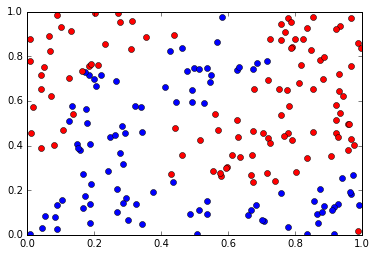

In [6]:
plt.plot(x_tr[y_tr[:, 0] == 1, 0], x_tr[y_tr[:, 0] == 1, 1], 'bo')
plt.plot(x_tr[y_tr[:, 0] == -1, 0], x_tr[y_tr[:, 0] == -1, 1], 'ro')

## Laplace

In [16]:
gp = GPCLaplace(SE(np.array([2., .5, .2])))

In [17]:
gp.fit(x_tr, y_tr, max_iter=10)

Iteration  0
Hyper-parameters at iteration  0 :  [ 2.91069247  0.46127596  0.1558164 ]


([array([ 2.91069247,  0.46127596,  0.1558164 ]),
  array([ 3.25168558,  0.40820283,  0.1440895 ]),
  array([ 3.32443893,  0.34814698,  0.11244364]),
  array([ 3.64429108,  0.29438199,  0.09705621]),
  array([ 3.63516782,  0.25232905,  0.09402925]),
  array([ 3.71962263,  0.21837354,  0.09092835]),
  array([ 3.53724467,  0.18443096,  0.11685886]),
  array([ 3.41602874,  0.16865981,  0.09506553]),
  array([ 3.42660149,  0.15499955,  0.09866613]),
  array([ 3.53755861,  0.14607129,  0.09304389])],
 [0.28098297119140625,
  0.8018708229064941,
  1.1703519821166992,
  1.5009498596191406,
  1.8624157905578613,
  2.162059783935547,
  2.5868449211120605,
  2.9822349548339844,
  3.2537789344787598,
  3.42879581451416])

In [18]:
y_pred = gp.predict(x_test, x_tr, y_tr)

In [19]:
np.sum(y_pred == y_te)

95

## Inducing Inputs

In [66]:
gp = GPCSparse(SE(np.array([1., .7, .2])), method='svi')

In [83]:
options = {'hermgauss_deg': 100, 'mode': 'adadelta', 'maxiter': 100, 
           'verbose': True, 'batch_size':20, 'step_rate': 0.5, 'decay': 0.8,
           'print_freq': 10}
gp.fit(x_tr, y_tr, num_inputs=30, method_options=options)

Using AdaDelta optimizer
Iteration  10 :
	Gradient norm 4.80148892211
Iteration  20 :
	Gradient norm 2.45607325295
Iteration  30 :
	Gradient norm 1.98762149022
Iteration  40 :
	Gradient norm 5.18646114439
Iteration  50 :
	Gradient norm 1.57858848655
Iteration  60 :
	Gradient norm 2.40247960851
Iteration  70 :
	Gradient norm 4.03272528331
Iteration  80 :
	Gradient norm 3.03342425079
Iteration  90 :
	Gradient norm 4.35602507846
Iteration  100 :
	Gradient norm 1.92980867659


In [84]:
gp.cov.get_params()

array([[  2.35909736e+00],
       [  2.19001831e-01],
       [  2.22220946e-05]])

In [85]:
y_pred = gp.predict(x_test)

In [86]:
np.sum(y_pred == y_te)

90